# Predicting Medical Costs using Machine Learning

## Project Overview
In this project, I aim to develop a machine learning model that can predict medical costs for individuals based on a variety of attributes. The dataset comprises over 1300 records, each representing an individual and containing features like age, gender, Body Mass Index (BMI), the number of children, smoking status, and the region in the US they reside in.

My goal is to analyze these attributes to understand their impact on medical costs and to build a predictive model. This model could be immensely beneficial for insurance companies to estimate insurance premiums, for hospitals to allocate resources, or for individuals to understand factors affecting their healthcare expenses.

## Dataset Description
The dataset includes the following attributes for each individual:
- **Age**: The age of the primary beneficiary.
- **Gender**: The gender of the primary beneficiary.
- **BMI**: The body mass index, providing an understanding of body weight that is relatively independent of height.
- **Children**: The number of children covered by health insurance / the number of dependents.
- **Smoker**: Whether the beneficiary is a smoker or not.
- **Region**: The beneficiary's residential area in the US (northeast, southeast, southwest, northwest).

## Objectives
1. **Exploratory Data Analysis (EDA)**: Conduct a comprehensive analysis to explore patterns, relationships, and anomalies in the data.
2. **Feature Engineering**: Transform and select appropriate features for the predictive model.
3. **Model Development**: Build and train a machine learning model to predict medical costs.
4. **Model Evaluation**: Assess the model's performance using appropriate metrics.
5. **Insights & Conclusion**: Derive insights from the model’s predictions and provide recommendations based on our findings.

By the end of this project, we aim to have a robust model that provides accurate predictions of medical costs, thereby offering valuable insights into how different factors contribute to healthcare expenses.

---


In [1]:
!pip install wquantiles


# Data Understanding and Preparation

In [6]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [7]:
# imports needed for notebook
import pandas as pd    
import numpy as np 
from scipy.stats import trim_mean
import scipy.stats as st
import wquantiles as wq 
import seaborn as sns  
import matplotlib.pyplot as plt     
import warnings 

import xgboost as xgb 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

plt.style.use('seaborn-v0_8')
warnings.filterwarnings('ignore')

In [8]:
# getting file path and reading in csv file
file_path='/kaggle/input/medical-insurance-costs/insurance.csv'
df=pd.read_csv(file_path)

In [9]:
# qucik look ay first 5 rows of df
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
# preliminary look at data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Observation
- **This data has a shape of 1337 rows and 7 columns with zero null values and the data types are all correct.**

In [11]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


### Observation
- **The numerical columns dont seem to have any outliers or unreasonable stats that suggest errors of any kind. More to follow** 

In [12]:
# number of unique records in df
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [13]:
# total number of duplicate records in df
df.duplicated().sum()

1

In [14]:
# list of columns
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [15]:
# sex only has two column categories as expected
df["sex"].nunique()

2

In [16]:
# smoker only has two column categories as expected
df["smoker"].nunique()

2

In [17]:
# changing columns to type categorical 
df['sex']=df['sex'].astype('category')
df['smoker']=df['smoker'].astype('category')

In [18]:
# look at df info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   object  
 6   charges   1338 non-null   float64 
dtypes: category(2), float64(2), int64(2), object(1)
memory usage: 55.2+ KB


# EDA

## Things to look for with respect to data:

1. What is the average medical insurance `charge` for the entire population ? <br/>
2. How is age, bmi, number of children and charges distributed ?<br/>
3. How is gender, smoking and region distributed ?<br/>
4. How is smoking distributed with respect to gender and religion? <br/>
5. How is gender distributed with respect to region ?<br/>
6. Is there a correlation between BMI & Charges? <br/>
7. Is there a correlation between Number of Children & Charges? <br/>
8. What kind of distribution does age, bmi and charges look ?

# Exploration of Means

In [21]:
# means of selected columns
df[['age','bmi','children','charges']].mean()

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [22]:
# trimming means of selected columns
cols=['age','bmi','children','charges']
for c in cols:
    print(f"{str(c).capitalize()} : {trim_mean(df[c].sort_values(ascending=False),0.1):,.0f}")

Age : 39
Bmi : 31
Children : 1
Charges : 11,076


In [24]:
# weighted mean of charges based off different columns
print(f"Charges based on Age : ${np.average(df['charges'],weights=df['age']):,.2f}")
print(f"Charges based on BMI : ${np.average(df['charges'],weights=df['bmi']):,.2f}")
print(f"Charges based on No. of Children : ${np.average(df['charges'],weights=df['children']):,.2f}")

Charges based on Age : $14,567.05
Charges based on BMI : $13,747.75
Charges based on No. of Children : $14,176.36


### Observation

- In summary, this code block is calculating and displaying the weighted mean of medical charges from a dataset, considering the impact of age, BMI, and the number of children respectively. This approach can provide insights into how different factors (age, BMI, children) influence average medical charges in the dataset.

In [25]:
# medians of selected columns
df[['age','bmi','children','charges']].median()

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [26]:
# calculate and print the weighted median of medical charges
print(f"Charges based on Age : ${wq.median(df['charges'],weights=df['age']):,.2f}")
print(f"Charges based on BMI : ${wq.median(df['charges'],weights=df['bmi']):,.2f}")
print(f"Charges based on No. of Children : ${wq.median(df['charges'],weights=df['children']):,.2f}")

Charges based on Age : $10,924.98
Charges based on BMI : $9,542.91
Charges based on No. of Children : $9,556.30


### Observation

- According to the Mean,the average medical insurance charge is $13,270.00 <br/>
- The average age is 39, average body mass index is 30, and average number of children is 1

## Exploration of Variances

In [27]:
# get variances of selected columns
df[['age','bmi','children','charges']].var()

age         1.974014e+02
bmi         3.718788e+01
children    1.453213e+00
charges     1.466524e+08
dtype: float64

In [28]:
# get standard deviations of selected columns
df[['age','bmi','children','charges']].std()

age            14.049960
bmi             6.098187
children        1.205493
charges     12110.011237
dtype: float64

In [29]:
# getting deviation from the mean for selected columns
for c in cols:
    print(f"{str(c).capitalize()} : {np.average(np.absolute(df[c]-df[c].mean())):,.2f}")

Age : 12.25
Bmi : 4.90
Children : 0.99
Charges : 9,091.13


In [30]:
# getting absolute deviation from the mean for selected columns
for c in cols:
    print(f"{str(c).capitalize()} : {np.average(np.absolute(df[c]-df[c].median())):,.2f}")

Age : 12.25
Bmi : 4.89
Children : 0.95
Charges : 8,351.04


In [31]:
# iqr for selected columns
for c in cols:
    iqr1,iqr2=np.percentile(df[c],[75,25])
    print(f"{str(c).capitalize()} : {np.subtract(iqr1,iqr2)}")

Age : 24.0
Bmi : 8.3975
Children : 2.0
Charges : 11899.625365


### Observation

- Age has a std of 14
- BMI has a std of 6
- Number of children has a std of 1
- Insurance charge has a deviation of $12,110.00


## Distribution Visuals

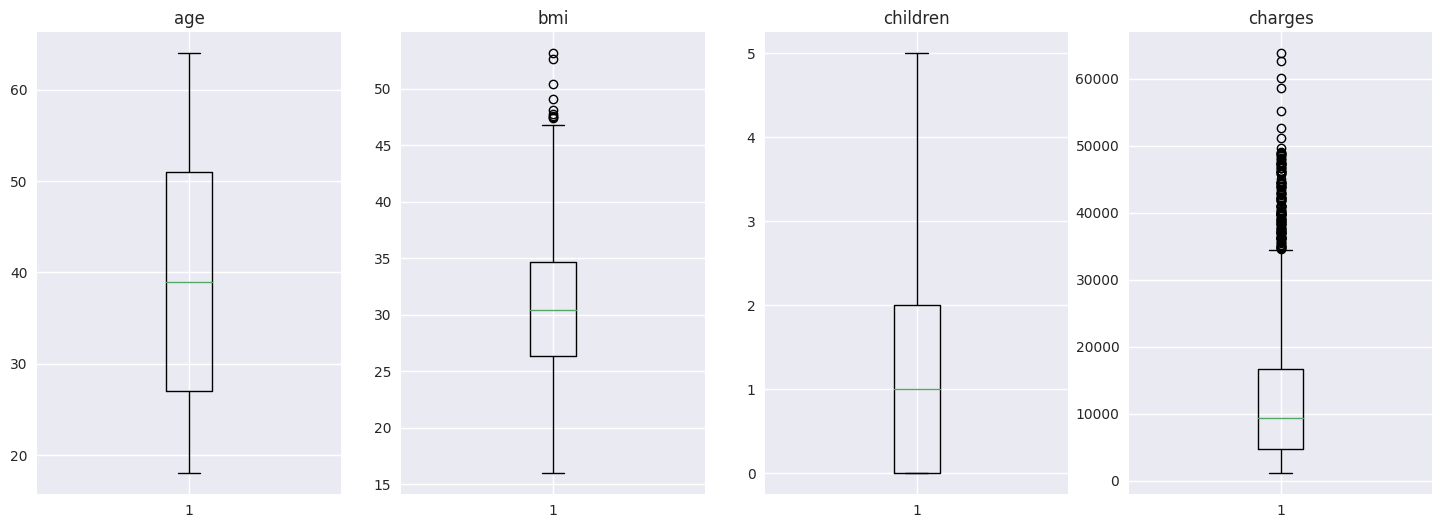

In [32]:
# boxplots of selected features
fig,ax=plt.subplots(ncols=4,figsize=(18,6))
for index,content in enumerate(cols):
    ax[index].boxplot(data=df,x=content)
    ax[index].set_title(content)

### Observation

- BMI and Charges have outliers

In [33]:
# percentiles of selected features
df[['age','bmi','children','charges']].quantile([0.05,0.25,0.5,0.75,1.0])

,age,bmi,children,charges
0.05,18.0,21.25600,0.0,1757.753400
0.25,27.0,26.29625,0.0,4740.287150
0.50,39.0,30.40000,1.0,9382.033000
0.75,51.0,34.69375,2.0,16639.912515
1.00,64.0,53.13000,5.0,63770.428010


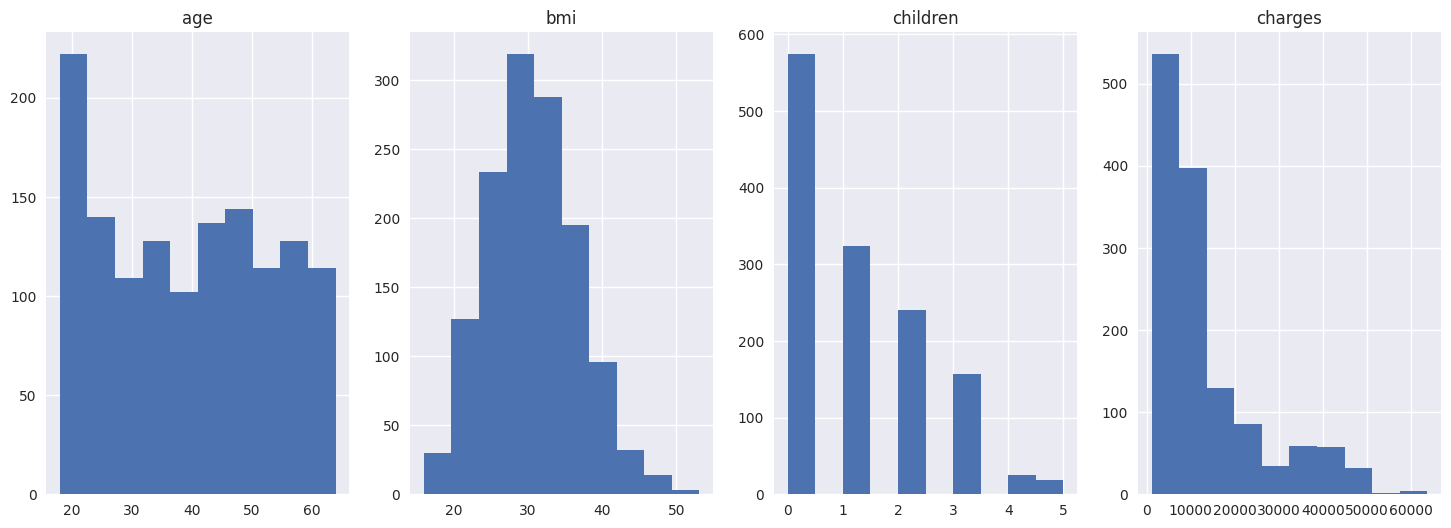

In [34]:
# histogram of slected features
fig,ax=plt.subplots(ncols=4,figsize=(18,6))
for index,content in enumerate(cols):
    ax[index].hist(data=df,x=content)
    ax[index].set_title(content)

### Observation

- BMI has an approximate normal distribution centered around 30

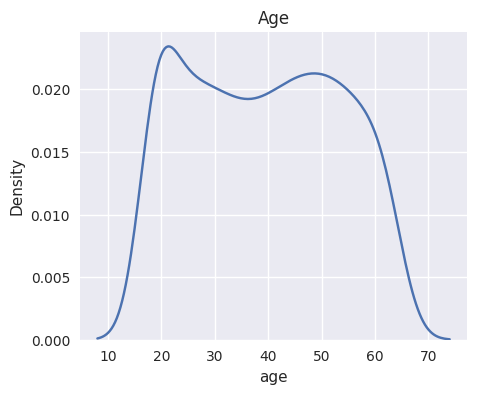

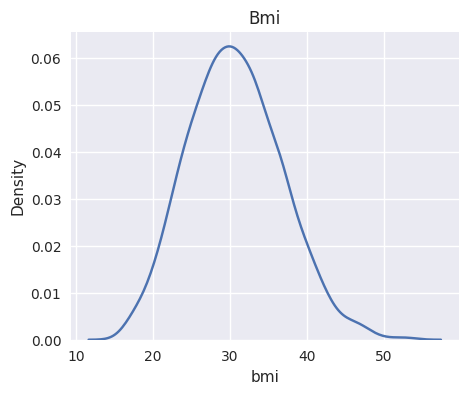

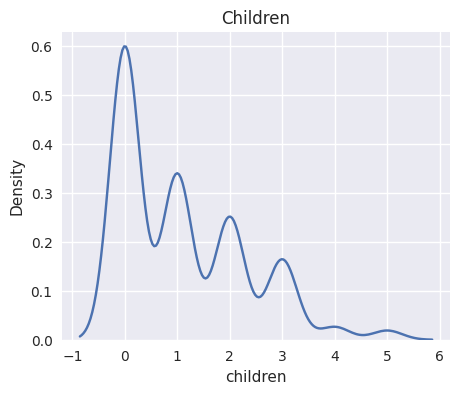

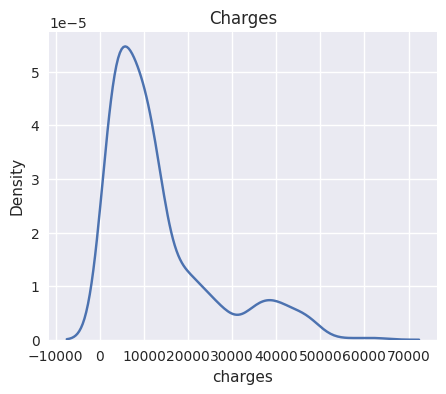

In [35]:
# kde for selected columns
for c in cols:
    plt.figure(figsize=(5,4))
    sns.kdeplot(data=df, x=c)
    plt.title(str(c).capitalize())
    plt.show()


### Observation

- Age is majorly distributed between 27 and 51 years.
- The Number of Children is greatly distributed between 0 and 2
- Medical Insurance Charge mainly falls between 4740 and 16640

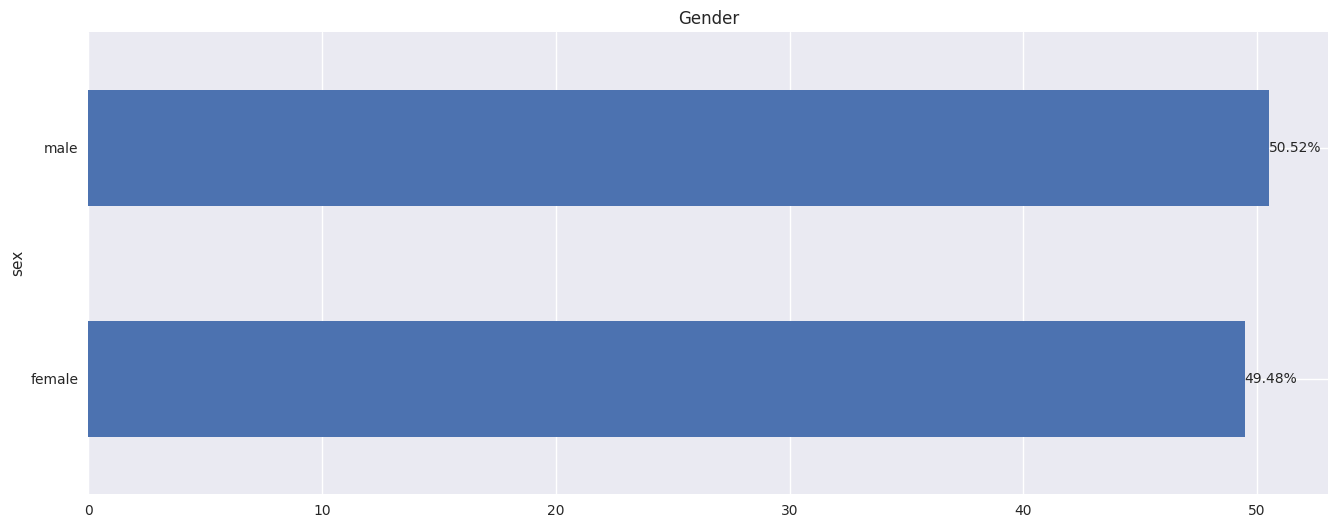

In [36]:
# horizontal barplot of distibution of sex column 
ax=(df['sex'].value_counts(normalize=True)*100).sort_values().plot(kind='barh',figsize=(16,6))
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
plt.title('Gender')
plt.show()

### Observation

- Male an females in dataset it close to evenly distributed

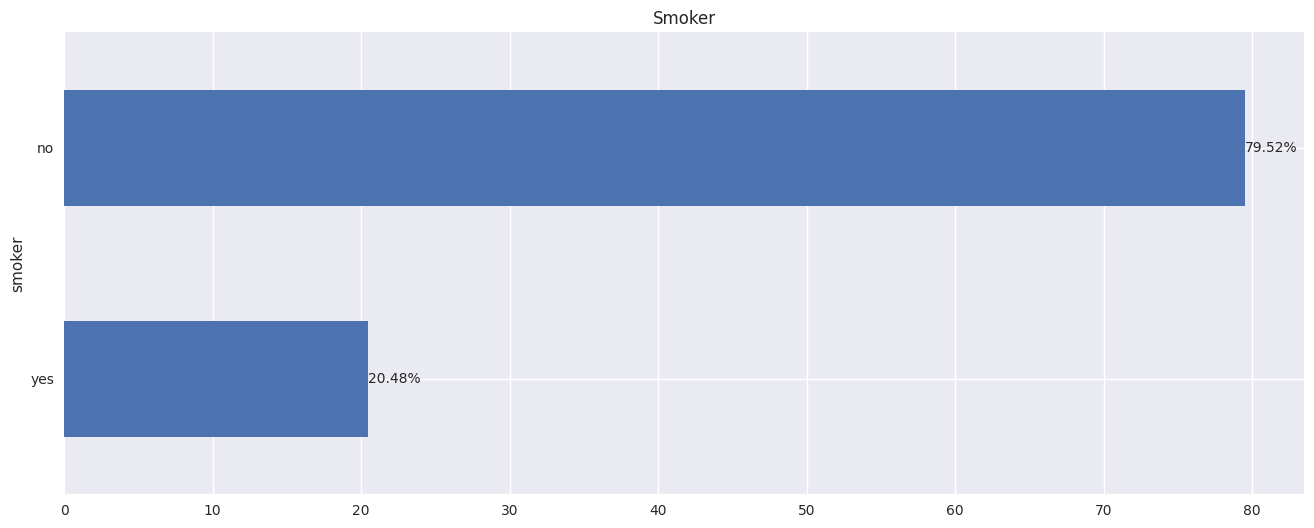

In [37]:
# horizontal barplot of distibution of smoker column
ax=(df['smoker'].value_counts(normalize=True)*100).sort_values().plot(kind='barh',figsize=(16,6))
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
plt.title('Smoker')
plt.show()

### Observation

- Approx 20% of the population are smokers

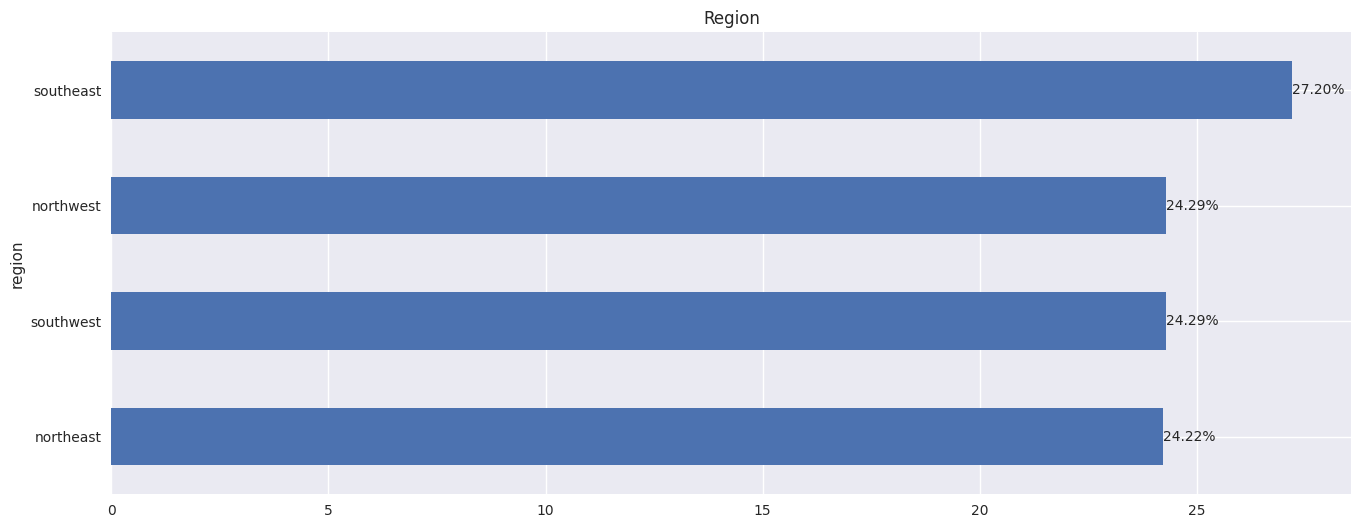

In [38]:
# horizontal barplot of distibution of region column
ax=(df['region'].value_counts(normalize=True)*100).sort_values().plot(kind='barh',figsize=(16,6))
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
plt.title('Region')
plt.show()

### Observation

- The Southeast region is more populated compared to the other regions

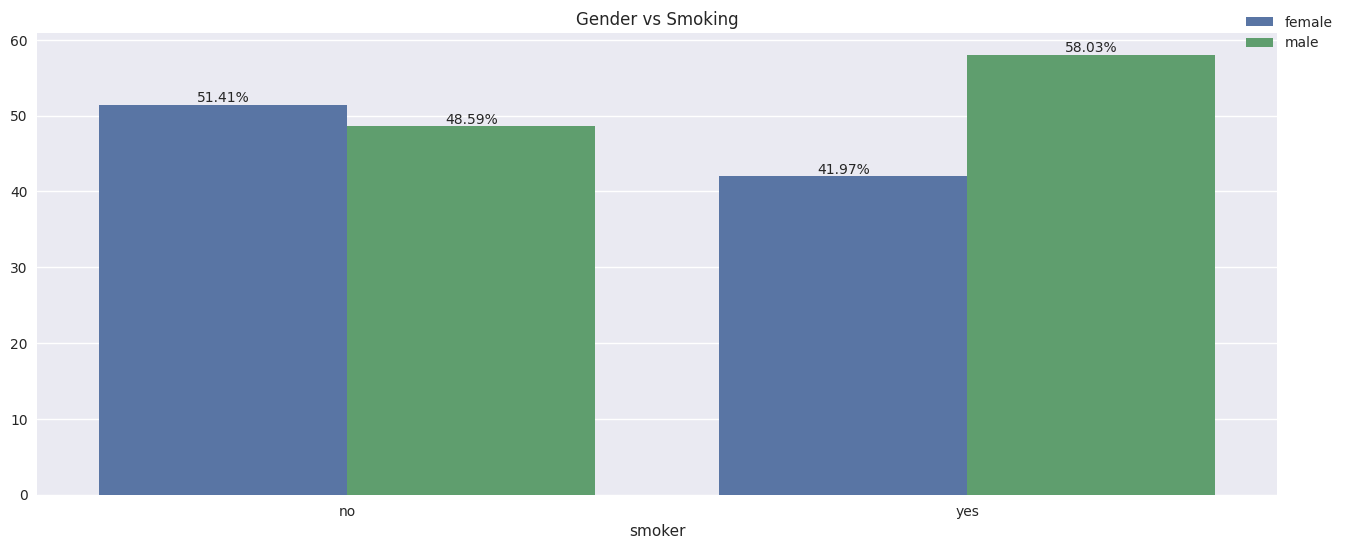

In [39]:
# bar plot visualizing the percentage distribution of genders within smoker and non-smoker groups
plt.figure(figsize=(16,6))
ax=sns.barplot(
    x=(df.groupby('smoker')['sex'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(df.groupby('smoker')['sex'].value_counts(normalize=True)*100).values,
    hue=(df.groupby('smoker')['sex'].value_counts(normalize=True)*100).index.get_level_values(1)
)
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
plt.legend(loc=[0.97,0.95])
plt.title('Gender vs Smoking')
plt.show()

### Observation

- 58% of smokers are Males while Females make up approximately 42%

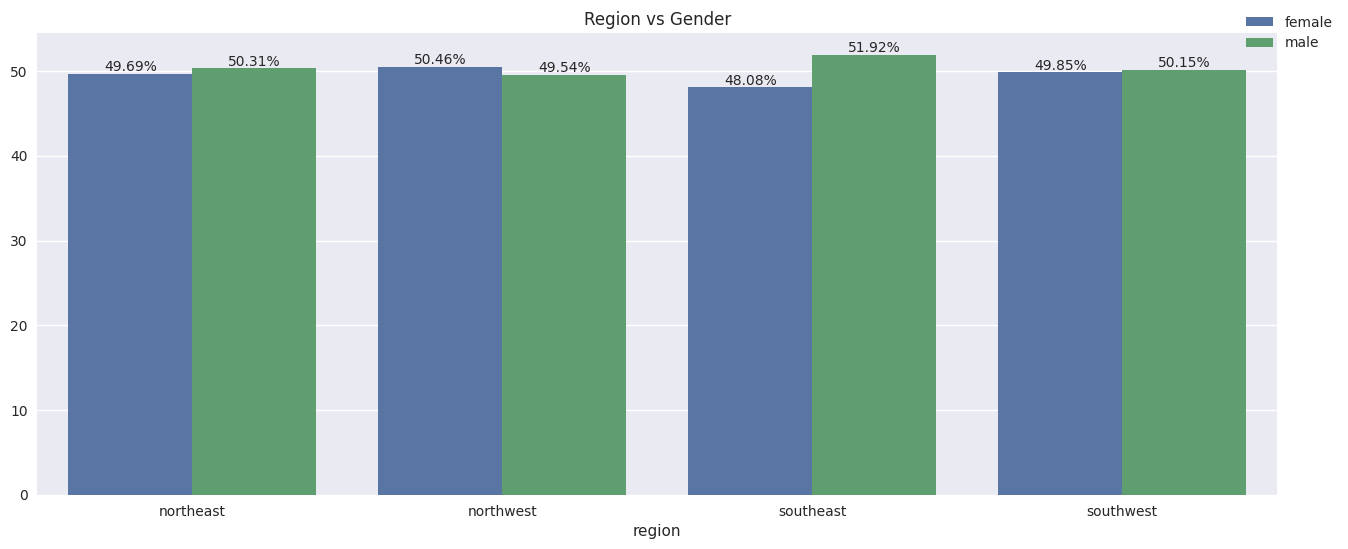

In [40]:
# grouped bar plot that shows the percentage distribution of genders across different regions
plt.figure(figsize=(16,6))
ax=sns.barplot(
    x=(df.groupby('region')['sex'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(df.groupby('region')['sex'].value_counts(normalize=True)*100).values,
    hue=(df.groupby('region')['sex'].value_counts(normalize=True)*100).index.get_level_values(1)
)
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
plt.legend(loc=[0.97,0.95])
plt.title('Region vs Gender')
plt.show()

### Observation

- Females have a higher percentage in the Northwest regions contrary to the other regions where Males are more dominant

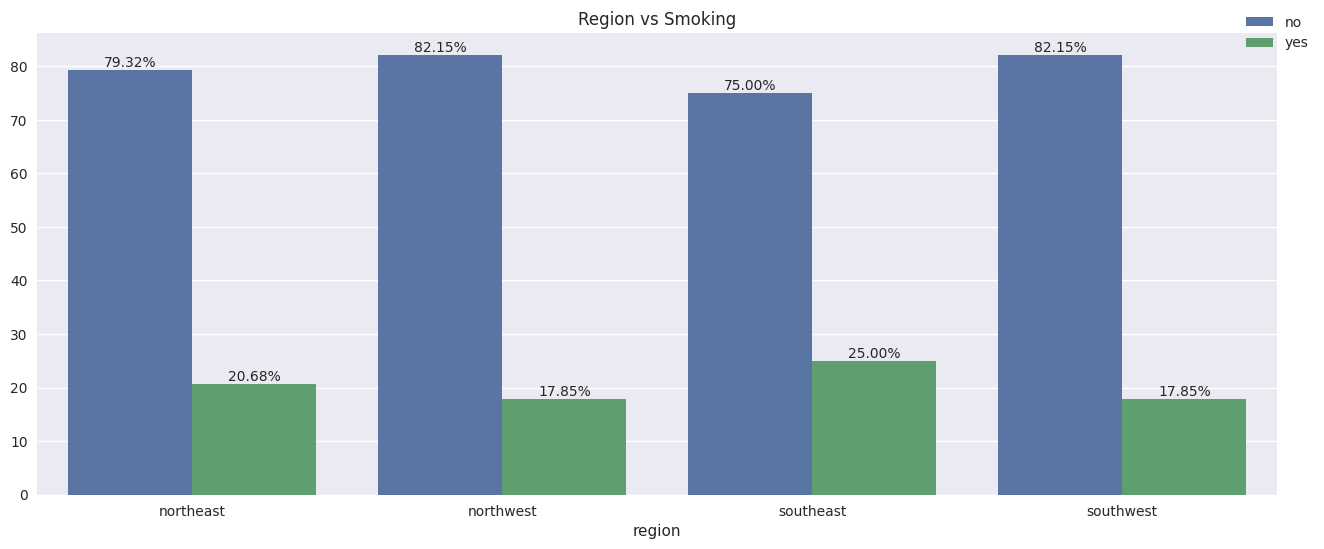

In [41]:
# bar plots of smokers grouped by region
plt.figure(figsize=(16,6))
ax=sns.barplot(
    x=(df.groupby('region')['smoker'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(df.groupby('region')['smoker'].value_counts(normalize=True)*100).values,
    hue=(df.groupby('region')['smoker'].value_counts(normalize=True)*100).index.get_level_values(1)
)
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
plt.legend(loc=[0.97,0.95])
plt.title('Region vs Smoking')
plt.show()

### Observation

- A small percentage of smokers exist in all the regions.

In [42]:
# seeing correlaton of selected columns
df[['age','bmi','children','charges']].corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


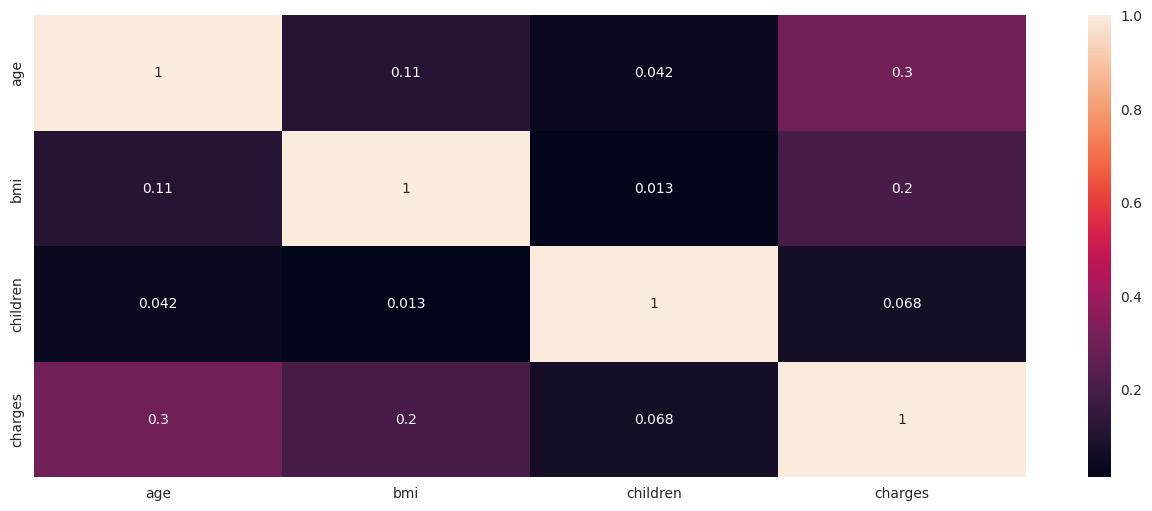

In [43]:
# heatmap of corr matrix
plt.figure(figsize=(16,6))
sns.heatmap(df[['age','bmi','children','charges']].corr(),annot=True)
plt.show()

### Observation

- Medical Insurance Charge has a low positive correlation with age, bmi, and number of children.

In [44]:
# Pearson correlation coefficient and its associated p-value between two columns, 'age' and 'charges'
corr,p_value=st.pearsonr(df['age'],df['charges'])
print(f"For Age;\nCorrelation Coeff : {corr}\nP-Value : {p_value:,.5f}")

For Age;
Correlation Coeff : 0.2990081933306476
P-Value : 0.00000


In [45]:
# same for bmi and charges
corr,p_value=st.pearsonr(df['bmi'],df['charges'])
print(f"For BMI;\nCorrelation Coeff : {corr}\nP-Value : {p_value:,.5f}")

For BMI;
Correlation Coeff : 0.1983409688336288
P-Value : 0.00000


### Observation

- Both Age and BMI have a p-value less than 0.001, thus there is a strong certainty in the correlation coefficient result.

In [46]:
# same for children and charges
corr,p_value=st.pearsonr(df['children'],df['charges'])
print(f"For Number of Children;\nCorrelation Coeff : {corr}\nP-Value : {p_value:,.5f}")

For Number of Children;
Correlation Coeff : 0.0679982268479048
P-Value : 0.01285


### Observation

- Number of Children has a p-value less than 0.05, thus there is a moderate certainty in the correlation coefficient result.

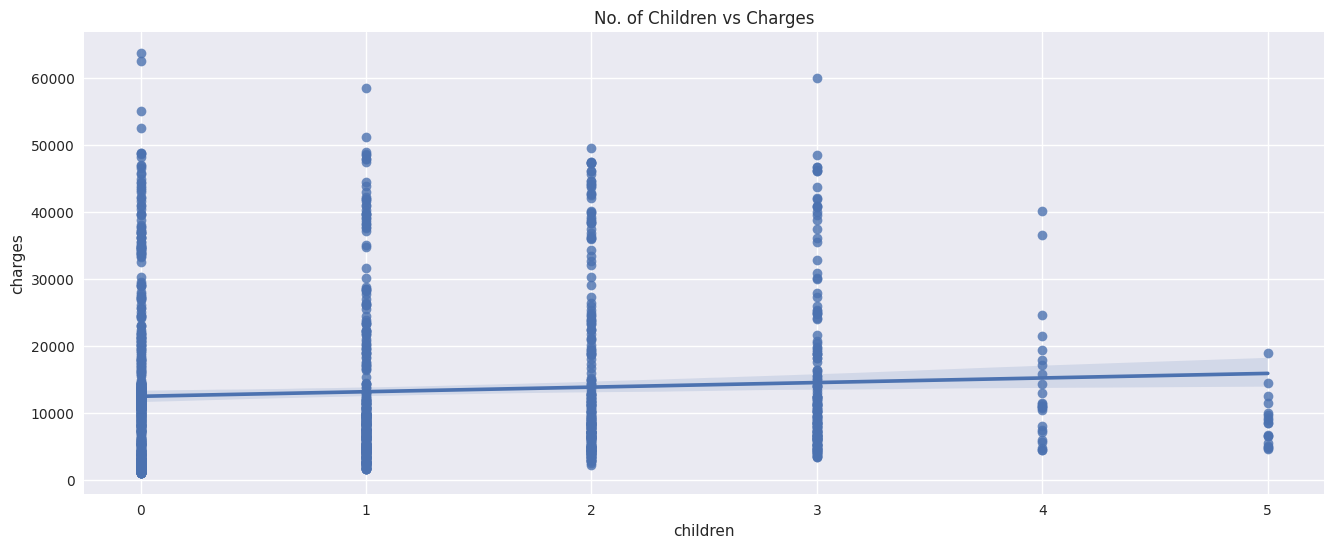

In [47]:
# regression plot of children vs charges
plt.figure(figsize=(16,6))
sns.regplot(x=df['children'],y=df['charges'])
plt.title('No. of Children vs Charges')
plt.show()

<Figure size 1600x600 with 0 Axes>

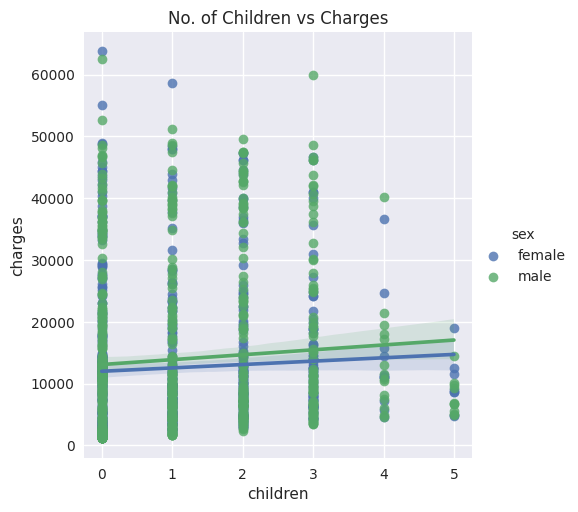

In [48]:
# same plot but with sex hue
plt.figure(figsize=(16,6))
sns.lmplot(data=df,x='children',y='charges',hue='sex')
plt.title('No. of Children vs Charges')
plt.show()

### Observation

- Low positive correlation between Age and Charges for both Males and Females.

In [49]:
p_table=pd.pivot_table(data=df,index='age',columns=['sex','smoker'],values='charges',fill_value='N/A')
p_table.iloc[:5]

sex          female                       male              
smoker           no           yes           no           yes
age                                                         
18      3716.739021  26862.269925  2695.672040  24779.460369
19      3879.902796   24896.85732  3219.922224  29105.608217
20      2483.682380   19522.50555  4862.543470  28615.790730
21      4516.335502    15359.1045  3211.126051  17942.106000
22      2705.702227    34751.5689  2396.333532  38684.146825

### Observation

- According to the Contigency table, both male and female smokers tend to pay more charges compared to non-smokers.

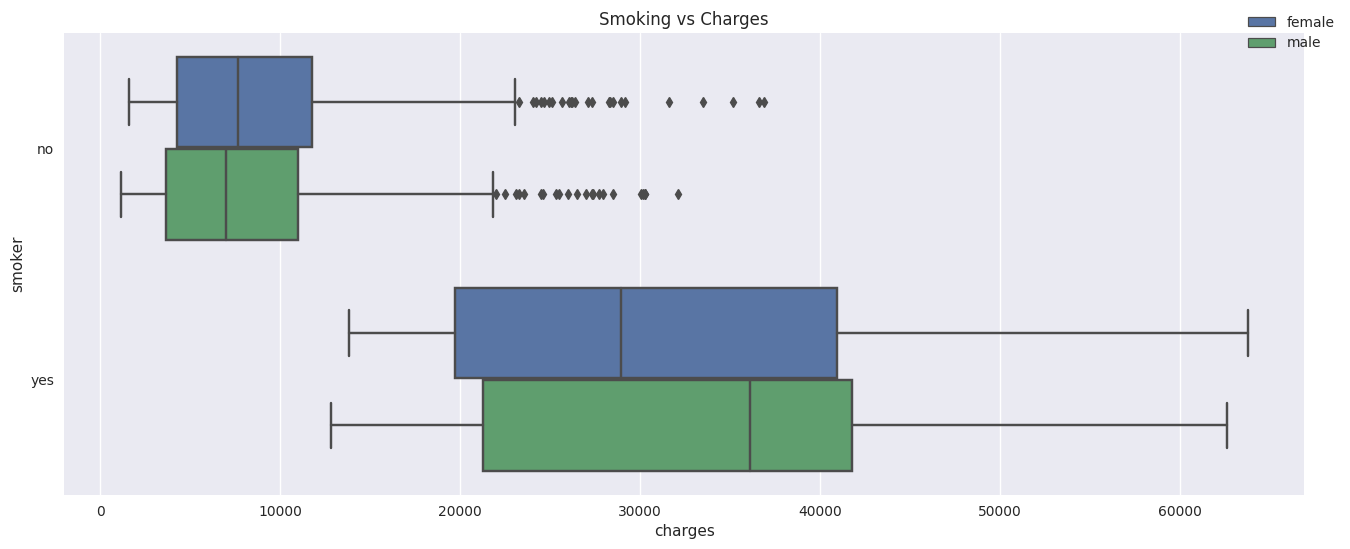

In [50]:
# boxplot of smocker vs charges with hue based off sex
plt.figure(figsize=(16,6))
sns.boxplot(y=df['smoker'],x=df['charges'],hue=df['sex'])
plt.legend(loc=[0.95,0.95])
plt.title('Smoking vs Charges')
plt.show()

### Observation

- Charges are high for smokers compared to non-smokers.

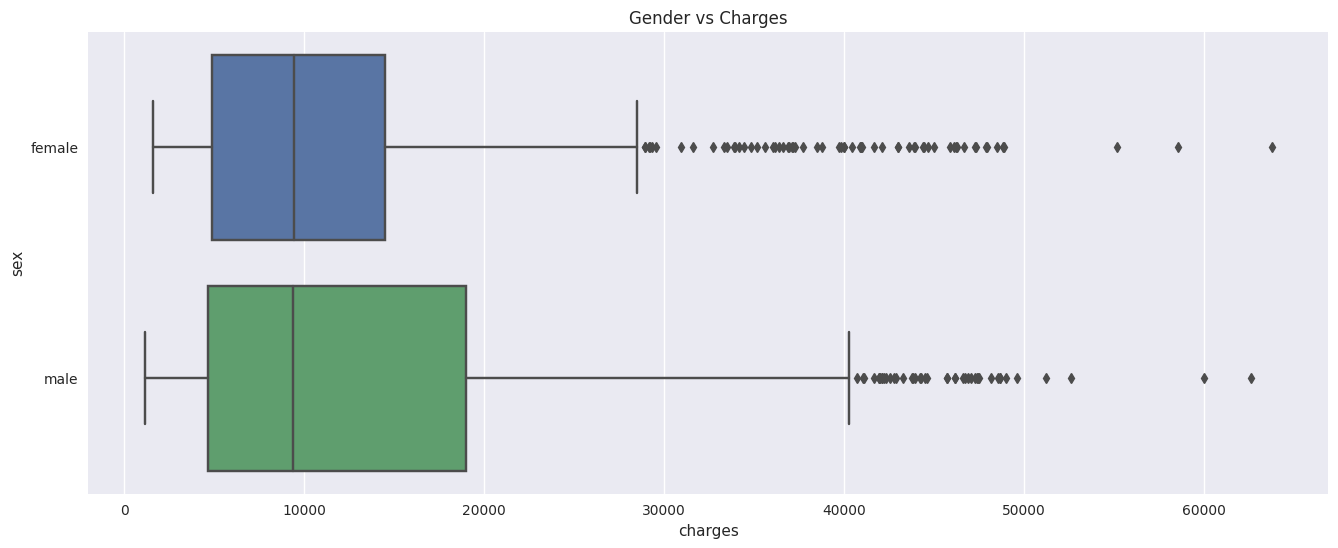

In [51]:
# boxplot of charges vs sex 
plt.figure(figsize=(16,6))
sns.boxplot(x=df['charges'],y=df['sex'])
plt.title('Gender vs Charges')
plt.show()

### Observation

- Insurance charges are high for males compared to females.


## Statistical Analysis

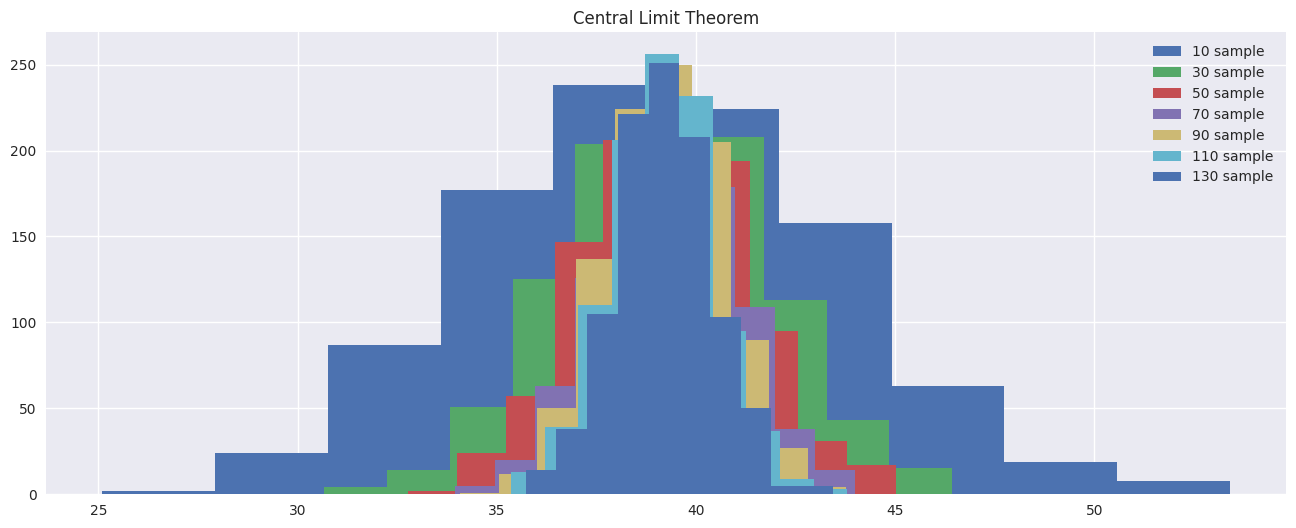

In [52]:
# CLT for age feature
plt.figure(figsize=(16,6))
sample_amount=range(10,150,20)
for index in sample_amount:
    sample=[]
    for i in range(1000):
        sample.append(df['age'].sample(index).mean())
    plt.hist(sample)
plt.legend([str(z) + ' sample' for z in sample_amount])
plt.title('Central Limit Theorem')
plt.show()

### Observation

- As more samples are added, age assumes a normal distribution.

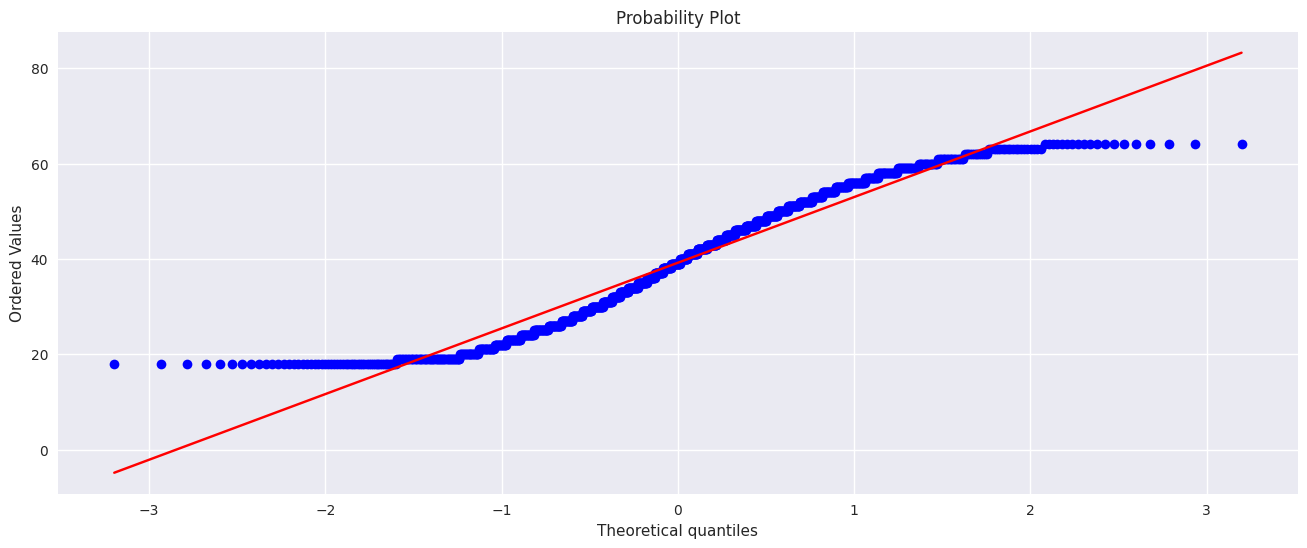

In [53]:
# qq plot for age coluns based off sample
fig,ax=plt.subplots(figsize=(16,6))
norm_sample=df['age'].sample(1000)
st.probplot(norm_sample,plot=ax)
plt.show()

### Observation

- Age has a uniform distribution

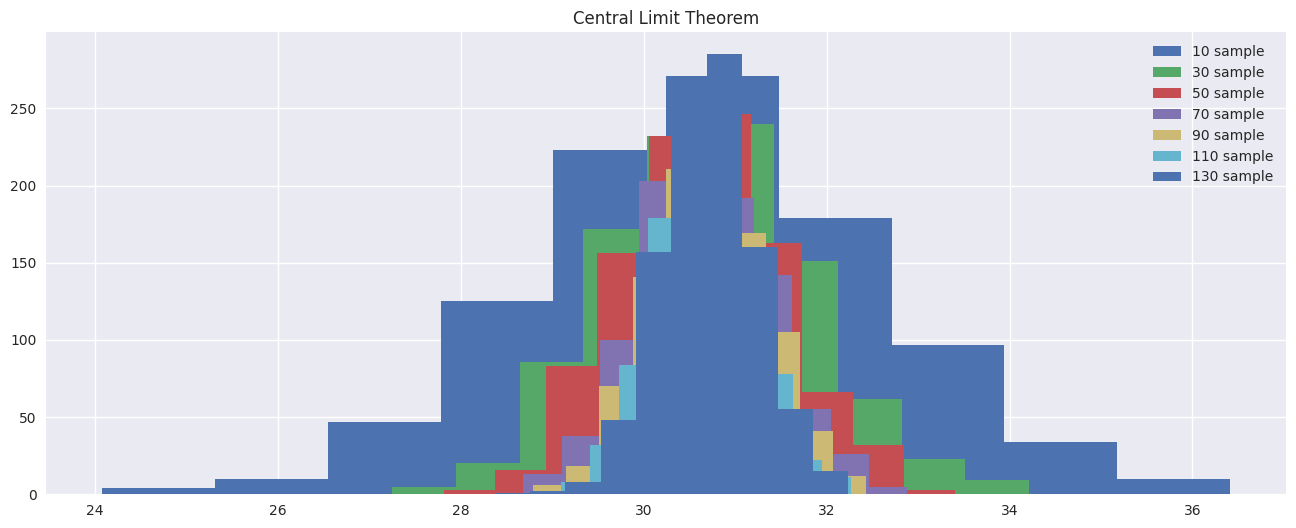

In [54]:
# CLT for bmi
plt.figure(figsize=(16,6))
sample_amount=range(10,150,20)
for index in sample_amount:
    sample=[]
    for i in range(1000):
        sample.append(df['bmi'].sample(index).mean())
    plt.hist(sample)
plt.legend([str(z) + ' sample' for z in sample_amount])
plt.title('Central Limit Theorem')
plt.show()

### Observation

- As more samples are added, Body Mass Index assumes a normal distribution

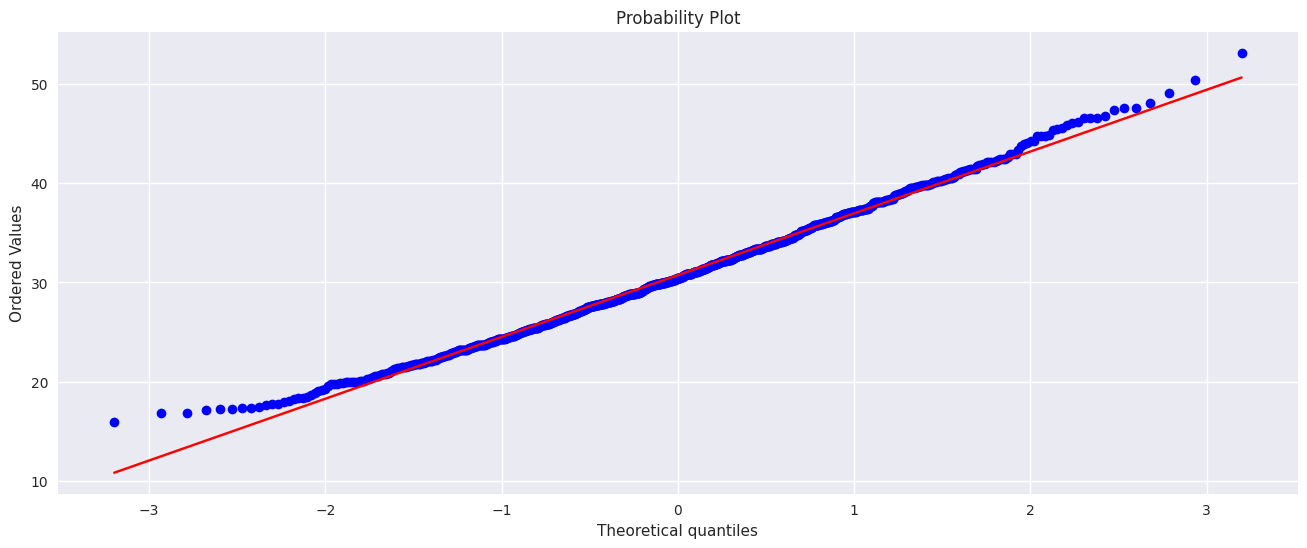

In [55]:
# qq plot for bmi
fig,ax=plt.subplots(figsize=(16,6))
norm_sample=df['bmi'].sample(1000)
st.probplot(norm_sample,plot=ax)
plt.show()

### Observation

- BMI has normal distribution

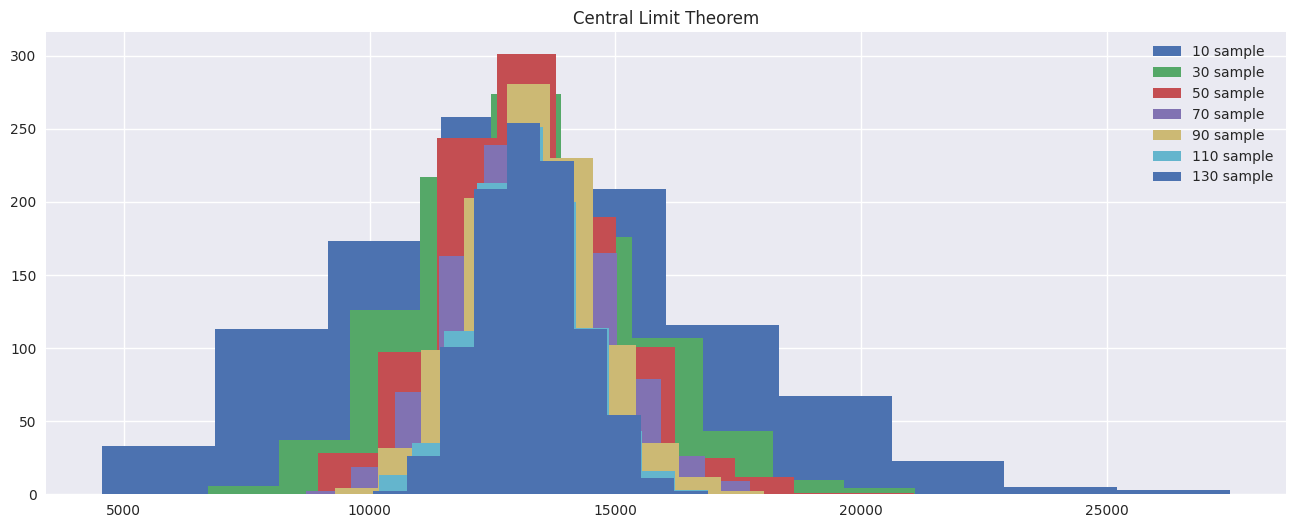

In [56]:
# CLT for charges
plt.figure(figsize=(16,6))
sample_amount=range(10,150,20)
for index in sample_amount:
    sample=[]
    for i in range(1000):
        sample.append(df['charges'].sample(index).mean())
    plt.hist(sample)
plt.legend([str(z) + ' sample' for z in sample_amount])
plt.title('Central Limit Theorem')
plt.show()

### Observation

- With addition of more samples, Charges assumes a normal distribution.

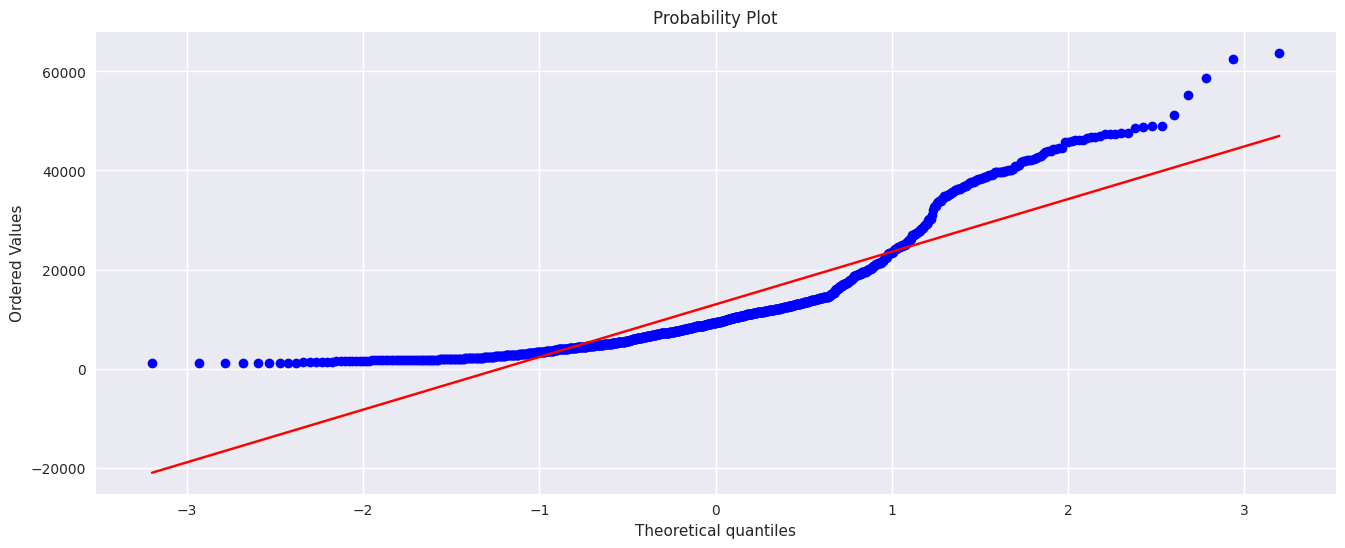

In [57]:
## qq plot for charges
fig,ax=plt.subplots(figsize=(16,6))
norm_sample=df['charges'].sample(1000)
st.probplot(norm_sample,plot=ax)
plt.show()

### Observation

- Charges deviate from normal distribution

## Hypothesis Testing

### Hypothesis 1

*Null Hypothesis : There is no association between Age and Charges.<br>
Alternative Hypothesis : There is an association between Age and Charges.*

In [58]:
result=st.chi2_contingency(df[['age','charges']])
print(f"Chisquare Statistic : {result.statistic:,.0f}\nP-Value : {result.pvalue:,.4f}\nDegrees of Freedom : {result.dof:,.0f}")

Chisquare Statistic : 32,158
P-Value : 0.0000
Degrees of Freedom : 1,337


### Observation

- Using a significance level of 5%, we reject the null hypothesis in favour of the alternate hypothesis. There is an association between Age and Insurance Charge

### Hypothesis 2

*Null Hypothesis : There is no association between BMI and Charges<br>
Alternative Hypothesis : There is an association between BMI and Charges.*

In [59]:
result=st.chi2_contingency(df[['bmi','charges']])
print(f"Chisquare Statistic : {result.statistic:,.0f}\nP-Value : {result.pvalue:,.4f}\nDegrees of Freedom : {result.dof:,.0f}")

Chisquare Statistic : 51,799
P-Value : 0.0000
Degrees of Freedom : 1,337


### Observation

- Using a significance level of 5%, we reject the null hypothesis in favour of the alternate hypothesis. There is an association between Body Mass Index and Insurance Charge.

### Hypothesis 3

*Null Hypothesis : There is no association between Number of Children and Charges<br>
Alternative Hypothesis : There is an association between Number of and Charges.*

In [60]:
result=st.chi2_contingency(df[['children','charges']])
print(f"Chisquare Statistic : {result.statistic:,.0f}\nP-Value : {result.pvalue:,.4f}\nDegrees of Freedom : {result.dof:,.0f}")

Chisquare Statistic : 3,589
P-Value : 0.0000
Degrees of Freedom : 1,337


### Observation

- Using a significance level of 5%, we reject the null hypothesis in favour of the alternate hypothesis. There is an association between Number of Children and Insurance Charge.

### Hypothesis 4

*Null Hypothesis : There is no association between Age and BMI<br>
Alternative Hypothesis : There is an association between Age and BMI.*

In [61]:
result=st.chi2_contingency(df[['age','bmi']])
print(f"Chisquare Statistic : {result.statistic:,.0f}\nP-Value : {result.pvalue:,.4f}\nDegrees of Freedom : {result.dof:,.0f}")

Chisquare Statistic : 3,635
P-Value : 0.0000
Degrees of Freedom : 1,337


### Observation

- Using a significance level of 5%, we reject the null hypothesis in favour of the alternate hypothesis. There is an association between Age and Body Mass Index.

### Hypothesis 5

*Null Hypothesis : There is no association between Age and Number of Children<br>
Alternative Hypothesis : There is an association between Age and Number of Children.*

In [62]:
result=st.chi2_contingency(df[['age','children']])
print(f"Chisquare Statistic : {result.statistic:,.0f}\nP-Value : {result.pvalue:,.4f}\nDegrees of Freedom : {result.dof:,.0f}")

Chisquare Statistic : 1,928
P-Value : 0.0000
Degrees of Freedom : 1,337


### Observation

- Using a significance level of 5%, we reject the null hypothesis in favour of the alternate hypothesis. There is an association between Age and Number of Children.

## Removing Outliers

In [63]:
# calculation IQR
iqr1,iqr2=np.percentile(df['bmi'],[75,25])
IQR=np.subtract(iqr1,iqr2)

In [64]:
# defining upper and lower limit
upper_limit=iqr1 + 1.5*IQR 
lower_limit=iqr2 - 1.5*IQR 
print(f"Upper Limit : {upper_limit:,.2f}\nLower Limit : {lower_limit:,.2f}")

Upper Limit : 47.29
Lower Limit : 13.70


In [65]:
# removing outliers accordin to IQR method
df=df.loc[(df['bmi'] <= upper_limit) & (df['bmi'] >= lower_limit)]

In [66]:
# same process for charges column
iqr1,iqr2=np.percentile(df['charges'],[75,25])
IQR=np.subtract(iqr1,iqr2)

In [67]:
upper_limit=iqr1 + 1.5*IQR 
lower_limit=iqr2 - 1.5*IQR 
print(f"Upper Limit : {upper_limit:,.2f}\nLower Limit : {lower_limit:,.2f}")

Upper Limit : 34,358.84
Lower Limit : -13,034.08


In [68]:
df=df.loc[(df['charges'] <= upper_limit) & (df['charges'] >= lower_limit)].reset_index(drop=True)
#print(f'Maximum Value : {data['charges'].max()}\nMinimum Value : {data['charges'].min()}')

# Predictive Modeling

In [69]:
# defining xgboost classifier
model=xgb.XGBRegressor(n_estimators=500)

In [70]:
# define feature matrix and target column
X=df.drop(['charges'],axis=1)
y=df['charges']

In [71]:
# splittting training and testing set
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.25)

In [72]:
# converting categorical columns using ohe
ohe=OneHotEncoder(handle_unknown='ignore').fit(X)
X_train=ohe.fit_transform(X_train)
X_val=ohe.transform(X_val)

In [73]:
# training model
model.fit(X_train,y_train,early_stopping_rounds=5,eval_set=[(X_val,y_val)],verbose=10)

[0]	validation_0-rmse:6024.25078
[10]	validation_0-rmse:4826.52335
[20]	validation_0-rmse:4772.78698


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [74]:
# predictions
y_pred=model.predict(X_val)
r2_score(y_val,y_pred)*100

50.60628439902395

In [75]:
# create df for predictions
prediction=pd.DataFrame({
    'actual':list(y_val),
    'predicted':list(y_pred)
})

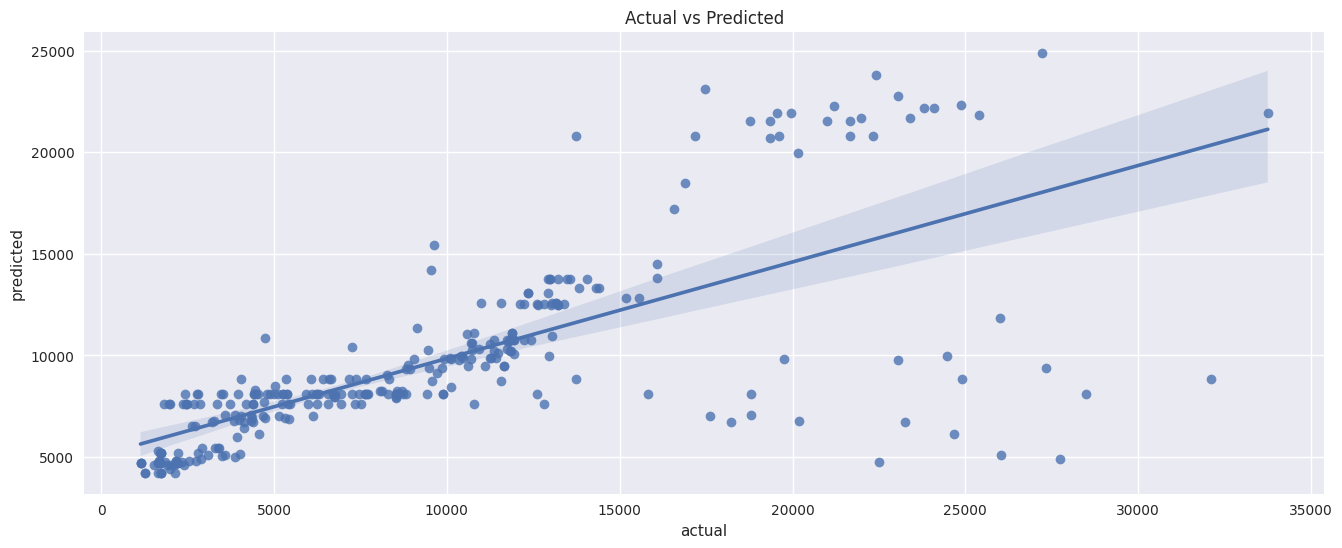

In [76]:
# lr plot
plt.figure(figsize=(16,6))
sns.regplot(x=prediction['actual'],y=prediction['predicted'])
plt.title('Actual vs Predicted')
plt.show()

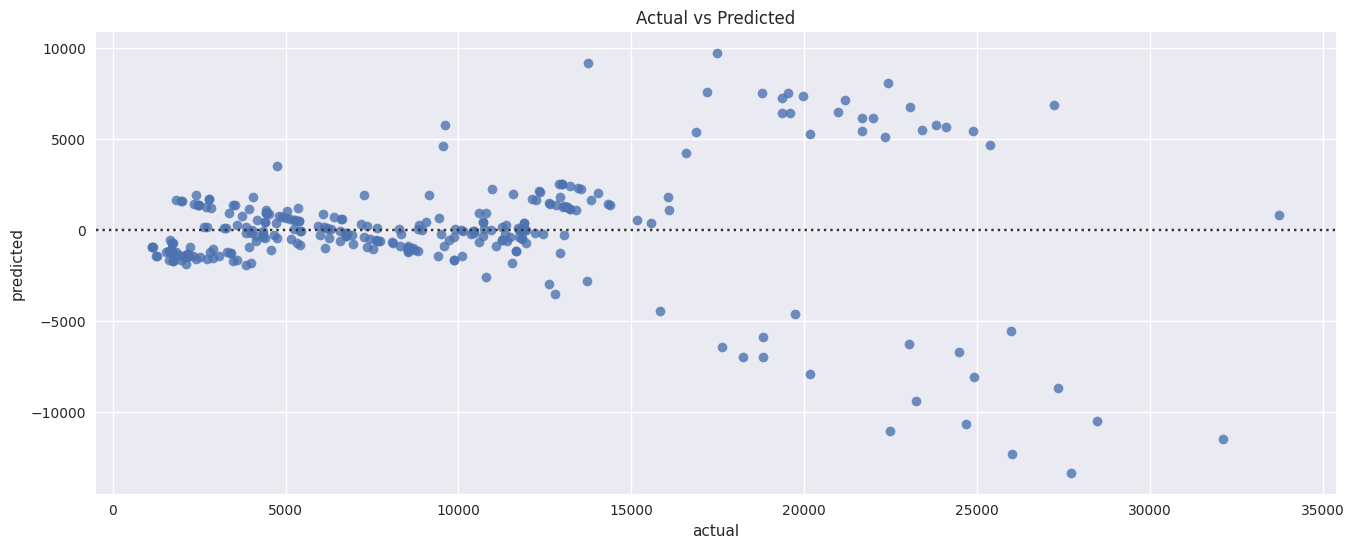

In [77]:
plt.figure(figsize=(16,6))
sns.residplot(x=prediction['actual'],y=prediction['predicted'])
plt.title('Actual vs Predicted')
plt.show()